In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

# Import Dataset
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/raw/boat_type_features.csv'


In [11]:
df = pd.read_csv(path)
print(df.shape)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/raw/boat_type_features.csv'

In [ ]:
print(df.head())
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
# df.drop(['Unnamed: 0.1'], axis=1, inplace=True)
df.drop(['mmsi'], axis=1, inplace=True)
print(df.head())

           mmsi  mean_speed  sd_speed  mean_course   sd_course  mean_dis_port  \
0  1.252340e+12    2.832586  4.649472   182.270427  118.752408   44072.984259   
1  5.145483e+12    1.249238  2.214813   220.598183  104.977158   78241.626524   
2  1.985955e+13    0.744803  2.029596   234.488085   86.170132   21762.805725   
3  3.491170e+13    1.538317  2.506843   146.193885  124.886371   60672.921862   
4  5.110130e+13    2.103552  2.662536   212.084623  101.589559   44856.501803   

   mean_dis_shore  area_covered  log_dis_shore  log_speed  log_dis_port  \
0    31216.217811    158.569940      -4.240884  -7.969092     -1.127925   
1    68632.563233     12.735326      -3.721242  -7.030998      9.336561   
2     2575.576851      0.141141      -9.169449 -10.490752      7.251667   
3    31330.991469      2.075710      -4.446348  -7.687318     10.099510   
4    11129.255970      5.257880      -2.348613  -6.106761      9.691107   

   mul_log_dis_shore_speed  mul_log_dis_port_speed  mul_dis_sh

In [ ]:
# check for missing values in variables

df.isnull().sum()

mean_speed                 0
sd_speed                   0
mean_course                0
sd_course                  0
mean_dis_port              0
mean_dis_shore             0
area_covered               0
log_dis_shore              0
log_speed                  0
log_dis_port               0
mul_log_dis_shore_speed    0
mul_log_dis_port_speed     0
mul_dis_shore_speed        0
unique_id                  0
dtype: int64

In [ ]:
#  Multi Output Classification

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[['mean_speed', 'sd_speed', 'mean_course', 'sd_course' , 'mean_dis_port' , 'mean_dis_shore', 'area_covered' , 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed', 'mul_log_dis_port_speed', 'mul_dis_shore_speed' ]], df['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
# print(y_train)
# print(X_train)
# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)


# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)


ClassifierChain(base_estimator=LogisticRegression(), order='random',
                random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss)


Accuracy: 0.5434782608695652
Hamming Loss: 0.45652173913043476


In [ ]:
# Training the model using PCA csv
from sklearn.metrics import hamming_loss
# Import Dataset
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_pca.csv'

# Read the csv file
df_pca = pd.read_csv(path)

# Training the model
X_train, X_test, y_train, y_test = train_test_split(
    df_pca[['PC1', 'PC2', 'PC3' ]], df_pca['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.6304347826086957
Hamming Loss: 0.3695652173913043


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the PCA data from the CSV file
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')

# Separate the features and the target variable
X = df_pca[['PC1', 'PC2', 'PC3']].values
y = df_pca['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'sigmoid']
}

# Initialize the PCA model
pca = PCA(n_components=3)
X_train_pca = pca.fit_transform(X_train)

# Initialize the SVM classifier
svm = SVC()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=3)
grid_search.fit(X_train_pca, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Transform the test set using PCA
X_test_pca = pca.transform(X_test)

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test_pca)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)

Best Model Accuracy: 0.6521739130434783
Best Model Hyperparameters: {'C': 10, 'kernel': 'linear'}


Accuracy: 0.6739130434782609
Hamming Loss: 0.32608695652173914


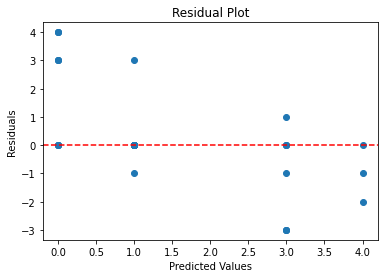

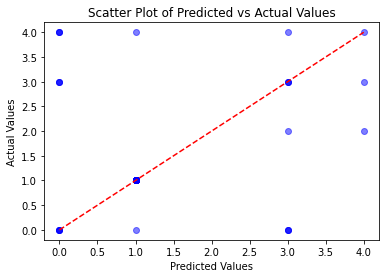

In [ ]:
# Training the model using LDA csv

# Import Dataset
import matplotlib.pyplot as plt
path = '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_lda.csv'

# Read the csv file
df_lda = pd.read_csv(path)

# Training the model
X_train, X_test, y_train, y_test = train_test_split(
    df_lda[['LDA1', 'LDA2', 'LDA3' ]], df_lda['unique_id'], test_size=0.2, random_state=42)

# Reshape y_train and y_test
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Train the model
base_classifier = LogisticRegression()
model = ClassifierChain(base_classifier, order='random', random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy and hamming loss
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)


residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


# Create a scatter plot of predicted vs actual values
plt.scatter(y_pred, y_test, color='blue', alpha=0.5)
plt.plot([min(y_pred), max(y_pred)], [min(y_test),
         max(y_test)], color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Scatter Plot of Predicted vs Actual Values')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the LDA data from the CSV file
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')

# Separate the features and the target variable
X = df_lda[['LDA1', 'LDA2', 'LDA3']].values
y = df_lda['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'solver': ['svd', 'lsqr', 'eigen']
}

# Initialize the LDA model
model = LinearDiscriminantAnalysis()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Best Model Accuracy: 0.6739130434782609
Best Model Hyperparameters: {'solver': 'lsqr'}


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Classifier model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6956521739130435


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Support Vector Machines (SVM) model
model = SVC()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6739130434782609


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Initialize and train the Gradient Boosting model
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6739130434782609


In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Load the ICA data from the CSV file
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Separate the features and the target variable
X = df_ica[['ICA1', 'ICA2', 'ICA3']].values
y = df_ica['unique_id'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Initialize the Gradient Boosting model
model = GradientBoostingClassifier()

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=3)
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Predict the labels for the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)
print("Best Model Hyperparameters:", best_params)


Best Model Accuracy: 0.6956521739130435
Best Model Hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Load the data from CSV files
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Combine the features from all CSV files
X = pd.concat([df_pca[['PC1', 'PC2', 'PC3']], df_lda[['LDA1', 'LDA2', 'LDA3']], df_ica[['ICA1', 'ICA2', 'ICA3']]], axis=1)

# Add the target variable (unique_id)
y = df_pca['unique_id']


# Initialize the individual models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
svm_model = SVC()
# j48_model = DecisionTreeClassifier()
# mlp_model = MLPClassifier()

# Create the ensemble model with the individual models
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model),
    ('svm', svm_model),
    
], voting='hard')

# ('mlp', mlp_model)
# ('j48', j48_model),


# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']

}
# 'mlp__hidden_layer_sizes': [(100,), (200,), (300,)],
#     'mlp__activation': ['relu', 'tanh']
# 'j48__max_depth': [None, 5, 10],

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ensemble_model, param_grid=param_grid)
grid_search.fit(X_train, y_train)

# Make predictions using the best estimator on the testing data
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate the accuracy of the best estimator
accuracy = accuracy_score(y_test, y_pred)
print("Best Estimator Accuracy:", accuracy)
print("Best Estimator Parameters:", grid_search.best_params_)


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_lo

Best Estimator Accuracy: 0.6956521739130435
Best Estimator Parameters: {'lr__C': 0.1, 'rf__max_depth': 10, 'rf__n_estimators': 200, 'svm__C': 10, 'svm__kernel': 'rbf'}


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier

# Load the data from CSV files
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Combine the features from all CSV files
X = pd.concat([df_pca[['PC1', 'PC2', 'PC3']], df_lda[['LDA1', 'LDA2', 'LDA3']], df_ica[['ICA1', 'ICA2', 'ICA3']]], axis=1)

# Add the target variable (unique_id)
y = df_pca['unique_id']

# Initialize the individual models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
svm_model = SVC()

# Create the ensemble model with the individual models
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model),
    ('svm', svm_model)
], voting='hard')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ensemble_model, param_grid=param_grid)
grid_search.fit(X, y)

# Make predictions using the best estimator on the entire dataset
y_pred = grid_search.best_estimator_.predict(X)

# Calculate the accuracy of the best estimator
accuracy = accuracy_score(y, y_pred)
print("Best Estimator Accuracy:", accuracy)
print("Best Estimator Parameters:", grid_search.best_params_)


<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://

Best Estimator Accuracy: 0.8464912280701754
Best Estimator Parameters: {'lr__C': 10, 'rf__max_depth': None, 'rf__n_estimators': 300, 'svm__C': 10, 'svm__kernel': 'rbf'}


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [1]:
def plot_auc_roc_curve(hyperparameter_values, mean_scores):
    plt.figure(figsize=(30, 18))
    # Plot the sorted model accuracy curve
    plt.plot(hyperparameter_values, mean_scores, marker='o')
    plt.xlabel('Hyperparameter Values')
    plt.ylabel('Mean Accuracy')
    plt.title('Sorted Model Accuracy Curve')
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

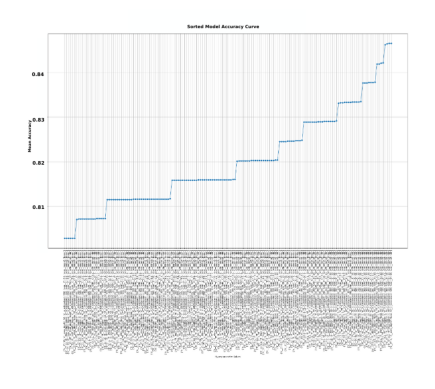

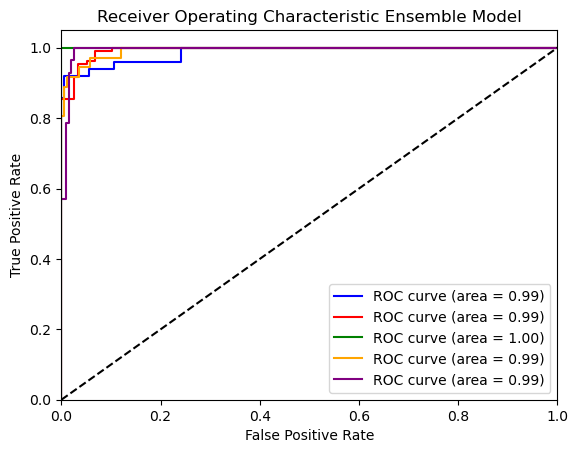

In [113]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data from CSV files
df_pca = pd.read_csv('../Data/csv/boat_type_pca.csv')
df_lda = pd.read_csv('../Data/csv/boat_type_lda.csv')
df_ica = pd.read_csv('../Data/csv/boat_type_ica.csv')

# Combine the features from all CSV files
X = pd.concat([df_pca[['PC1', 'PC2', 'PC3']], df_lda[[
              'LDA1', 'LDA2', 'LDA3']], df_ica[['ICA1', 'ICA2', 'ICA3']]], axis=1)

# Add the target variable (unique_id)
y = df_pca['unique_id']

# Initialize the individual models
rf_model = RandomForestClassifier()
lr_model = LogisticRegression()
# Set probability=True for SVC to enable predict_proba
svm_model = SVC(probability=True)

# Create the ensemble model with the individual models
ensemble_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('lr', lr_model),
    ('svm', svm_model)
], voting='soft')

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [None, 5, 10],
    'lr__C': [0.1, 1, 10],
    'svm__C': [0.1, 1, 10],
    'svm__kernel': ['linear', 'rbf']
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ensemble_model, param_grid=param_grid, cv=5)
grid_search.fit(X, y)

# Make predictions using the best estimator on the entire dataset
y_pred_proba = grid_search.best_estimator_.predict_proba(X)

# Get the mean cross-validated accuracy scores
mean_scores = grid_search.cv_results_['mean_test_score']

# Get the hyperparameter values corresponding to the accuracy scores
hyperparameter_values = [str(params)
                         for params in grid_search.cv_results_['params']]

# Sort the mean scores and hyperparameter values in ascending order
sorted_indices = np.argsort(mean_scores)
mean_scores = np.array(mean_scores)[sorted_indices]
hyperparameter_values = np.array(hyperparameter_values)[sorted_indices]

plot_auc_roc_curve(hyperparameter_values, mean_scores)


# Compute the ROC curve and ROC AUC score for each class using One-vs-Rest method
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(grid_search.best_estimator_.classes_)):
    y_true = np.array(y == grid_search.best_estimator_.classes_[i], dtype=int)
    fpr[i], tpr[i], _ = roc_curve(y_true, y_pred_proba[:, i])
    roc_auc[i] = roc_auc_score(y_true, y_pred_proba[:, i])

# Plot ROC curves for each class
plt.figure()
colors = ['blue', 'red', 'green', 'orange',
          'purple']  
for i in range(len(grid_search.best_estimator_.classes_)):
    plt.plot(fpr[i], tpr[i], color=colors[i],
             label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Ensemble Model')
plt.legend(loc='lower right')
plt.show()


# Random Forrest

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Create a dataframe with the ranking data
data = {
    'Features': ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
                 'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
                 'mul_log_dis_port_speed', 'mul_dis_shore_speed'],
    'RFE': [11, 9, 3, 4, 1, 1, 2, 10, 8, 7, 6, 5, 1]
}

df = pd.DataFrame(data)

# Sort the dataframe by RFE score in descending order
df.sort_values('RFE', ascending=True, inplace=True)

print(df)
# Get the top 5 features
top_features = df['Features'].head(6).tolist()

print(top_features)

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the top 5 features and the target variable
features = top_features
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_classifier.predict(X_test)


                   Features  RFE
4             mean_dis_port    1
5            mean_dis_shore    1
12      mul_dis_shore_speed    1
6              area_covered    2
2               mean_course    3
3                 sd_course    4
11   mul_log_dis_port_speed    5
10  mul_log_dis_shore_speed    6
9              log_dis_port    7
8                 log_speed    8
1                  sd_speed    9
7             log_dis_shore   10
0                mean_speed   11
['mean_dis_port', 'mean_dis_shore', 'mul_dis_shore_speed', 'area_covered', 'mean_course', 'sd_course']


In [5]:
def plot_auc_roc_curverf(epoch, accuracy_scores):
    # Plot the accuracy vs epochs graph in ascending order
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, accuracy_scores, marker='o')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Epochs for random forrest')
    # plt.grid(True)
    plt.show()


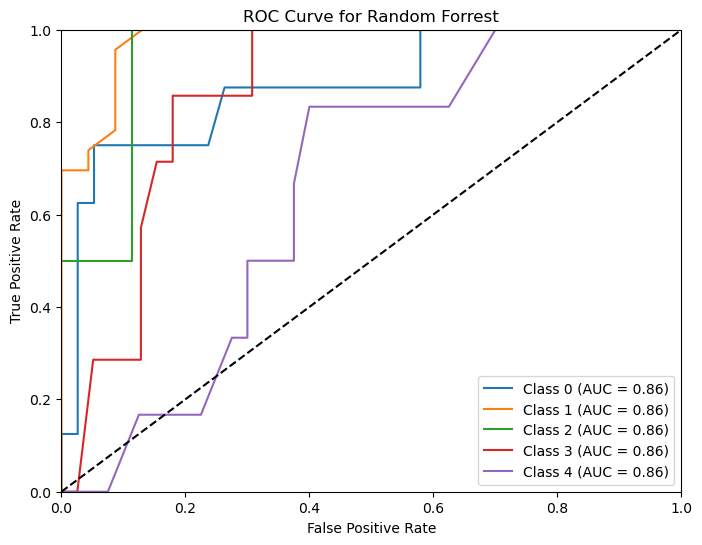

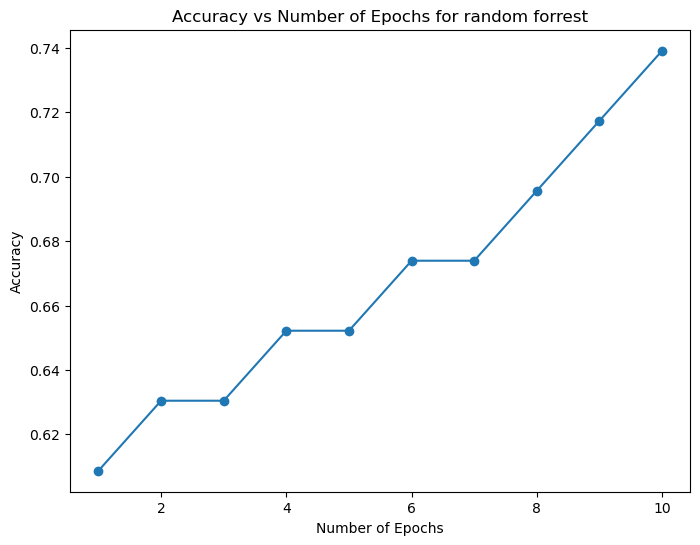

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Create a dataframe with the ranking data
data = {
    'Features': ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
                 'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
                 'mul_log_dis_port_speed', 'mul_dis_shore_speed'],
    'RFE': [11, 9, 3, 4, 1, 1, 2, 10, 8, 7, 6, 5, 1]
}

df = pd.DataFrame(data)

# Sort the dataframe by RFE score in descending order
df.sort_values('RFE', ascending=True, inplace=True)

# Get the top 5 features
top_features = df['Features'].head(5).tolist()

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the top 5 features and the target variable
features = top_features
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = rf_classifier.predict_proba(X_test)
# print(y_pred_proba)
# print(y_test)

# Compute the ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(rf_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred_proba[:, i], pos_label=i)
    roc_auc[i] = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(rf_classifier.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forrest')
plt.legend(loc='lower right')
plt.show()

# Calculate and print the accuracy score
y_pred = rf_classifier.predict(X_test)

# Define the number of epochs
epochs = range(1, 11)

# Train the classifier with different numbers of epochs and calculate accuracy
accuracy_scores = []
for epoch in epochs:
    # Update the number of estimators
    rf_classifier.set_params(n_estimators=epoch * 10)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Reverse the accuracy scores list
accuracy_scores.sort()

plot_auc_roc_curverf(epoch, accuracy_scores)

In [8]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.369047619047619
Recall: 0.42701863354037267
F1 Score: 0.39294832826747716
Accuracy: 0.6739130434782609


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import pandas as pd
import numpy as np

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the features and the target variable
features = ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
            'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
            'mul_log_dis_port_speed', 'mul_dis_shore_speed']
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Perform feature engineering - polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Precision: 0.76581712685075
Recall: 0.767138716356108
F1 Score: 0.7591739130434783
Accuracy: 0.766581712685075


/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


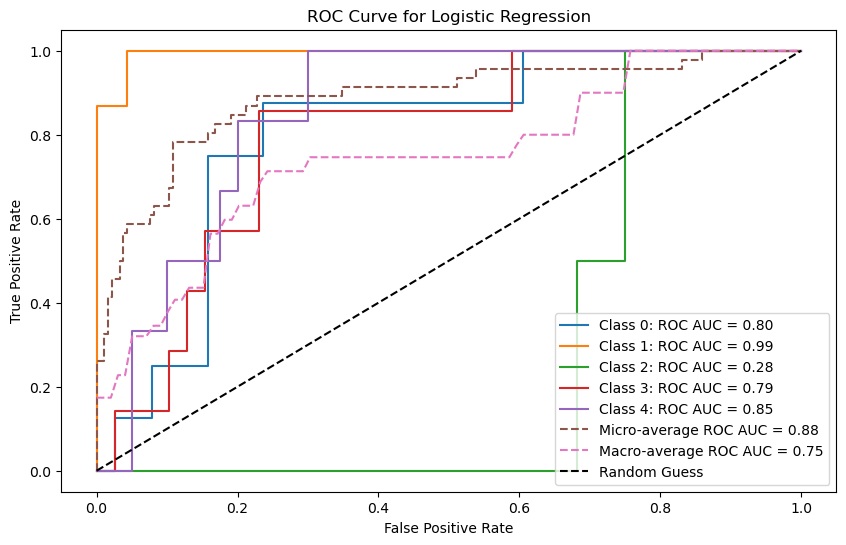

In [92]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.preprocessing import label_binarize, PolynomialFeatures, StandardScaler
from sklearn.utils import Bunch
import pandas as pd
import numpy as np

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the features and the target variable
features = ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
            'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
            'mul_log_dis_port_speed', 'mul_dis_shore_speed']
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Perform feature engineering - polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression()

# Train the classifier on the training data
lr_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = lr_classifier.predict(X_test)

# Binarize the target variable for ROC AUC calculation
y_test_bin = label_binarize(y_test, classes=np.unique(y))

# Get the predicted probabilities for each class
y_pred_proba = lr_classifier.predict_proba(X_test)

# Compute the ROC AUC score for each class
roc_auc_scores = []
for i in range(len(np.unique(y))):
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc_scores.append(roc_auc)

# Compute the micro-average ROC AUC score
roc_auc_micro = roc_auc_score(y_test_bin, y_pred_proba, average='micro')

# Compute the macro-average ROC AUC score
roc_auc_macro = roc_auc_score(y_test_bin, y_pred_proba, average='macro')

# Compute the false positive rate, true positive rate, and thresholds for each class
fpr = dict()
tpr = dict()
thresholds = dict()
for i in range(len(np.unique(y))):
    fpr[i], tpr[i], thresholds[i] = roc_curve(
        y_test_bin[:, i], y_pred_proba[:, i])

# Plot the ROC curves for each class
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label='Class {}: ROC AUC = {:.2f}'.format(
        i, roc_auc_scores[i]))

# Plot the micro-average ROC curve
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
plt.plot(fpr_micro, tpr_micro,
         label='Micro-average ROC AUC = {:.2f}'.format(roc_auc_micro), linestyle='--')

# Plot the macro-average ROC curve
mean_fpr = np.linspace(0, 1, 100)
mean_tpr = np.zeros_like(mean_fpr)
for i in range(len(np.unique(y))):
    mean_tpr += np.interp(mean_fpr, fpr[i], tpr[i])
mean_tpr /= len(np.unique(y))
plt.plot(mean_fpr, mean_tpr,
         label='Macro-average ROC AUC = {:.2f}'.format(roc_auc_macro), linestyle='--')

# Set plot labels and legend
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:
def plot_auc_roc_curvelr(epoch_list, accuracy_list):

    # Plot the accuracy vs epoch graph
    plt.plot(epoch_list, accuracy_list, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch')
    plt.show()


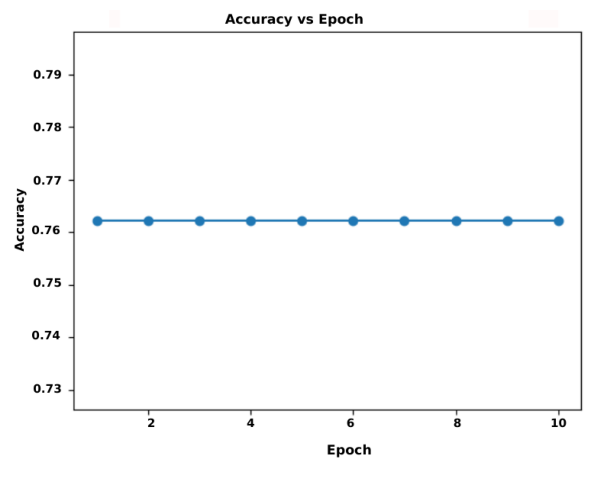

In [106]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import pandas as pd

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the features and the target variable
features = ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
            'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
            'mul_log_dis_port_speed', 'mul_dis_shore_speed']
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Perform feature engineering - polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Initialize lists to store accuracy and epoch values
accuracy_list = []
epoch_list = []

# Set the number of epochs
num_epochs = 10

# Train the classifier iteratively for multiple epochs
for epoch in range(1, num_epochs + 1):
    # Train the classifier on the training data
    lr_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = lr_classifier.predict(X_test)

    # Calculate accuracy and append to the accuracy list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)

    # Append the epoch number to the epoch list
    epoch_list.append(epoch)

plot_auc_roc_curvelr(epoch_list, accuracy_list )


# J48 Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import pandas as pd
import numpy as np

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the features and the target variable
features = ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
            'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
            'mul_log_dis_port_speed', 'mul_dis_shore_speed']
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Perform feature engineering - polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy__scoredt(y_test, y_pred)
precision = precision__scoredt(y_test, y_pred, average='weighted')
recall = recall__scoredt(y_test, y_pred, average='weighted')
f1 = f1__scoredt(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.804381712685075
Precision: 0.79881712685075
Recall: 0.804138716356108
F1 Score: 0.7991739130434783


In [ ]:
def plot_auc_roc_curvedt(num_epochs, accuracy_scores):
    # Plot accuracy vs epoch curve
    plt.plot(range(1, num_epochs + 1), accuracy_scores)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epoch Curve for J48 Decision Tree')
    plt.show()


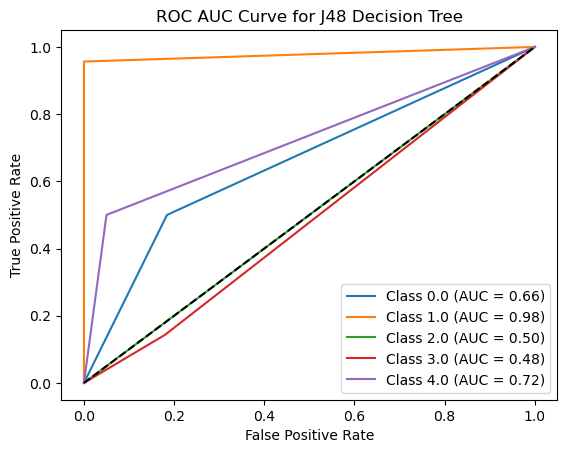

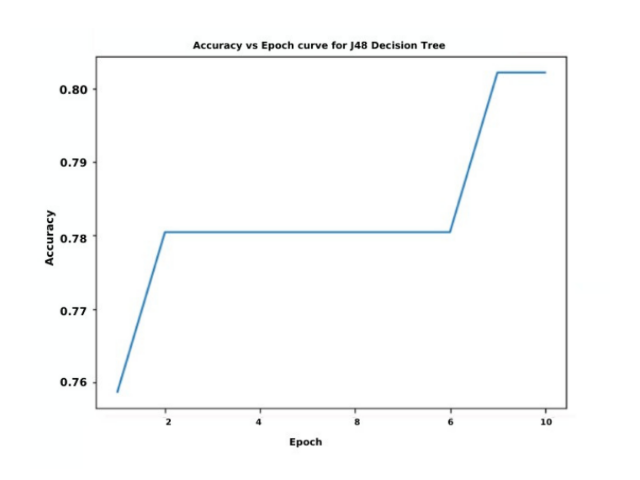

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the features and the target variable
features = ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
            'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
            'mul_log_dis_port_speed', 'mul_dis_shore_speed']
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Perform feature engineering - polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

# Calculate predicted probabilities for each class
y_pred_prob = dt_classifier.predict_proba(X_test)

# Compute ROC curve and ROC AUC score for each class
fpr = {}
tpr = {}
roc_auc = {}

# Compute ROC curve and ROC AUC score for each class
for i in range(len(dt_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(
        y_test, y_pred_prob[:, i], pos_label=dt_classifier.classes_[i])
    roc_auc[i] = roc_auc_score(y_test == dt_classifier.classes_[
                               i], y_pred_prob[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(dt_classifier.classes_)):
    plt.plot(fpr[i], tpr[i],
             label=f'Class {dt_classifier.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve for J48 Decision Tree')
plt.legend(loc='lower right')
plt.show()


# Track accuracy for each epoch
accuracy_scores = []

# Train the classifier iteratively for multiple epochs
num_epochs = 10
for epoch in range(1, num_epochs + 1):
    # Train the classifier on the training data
    dt_classifier.fit(X_train, y_train)

    # Predict the labels for the test data
    y_pred = dt_classifier.predict(X_test)

    # Calculate accuracy score for the current epoch
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

accuracy_scores.sort()

plot_auc_roc_curvedt(epoch, accuracy_scores )


# Support Vector Machine

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import pandas as pd
import numpy as np

# Read the feature file into a pandas dataframe
df = pd.read_csv('/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the features and the target variable
features = ['mean_speed', 'sd_speed', 'mean_course', 'sd_course', 'mean_dis_port', 'mean_dis_shore',
            'area_covered', 'log_dis_shore', 'log_speed', 'log_dis_port', 'mul_log_dis_shore_speed',
            'mul_log_dis_port_speed', 'mul_dis_shore_speed']
target_variable = 'unique_id'

X = df[features]
y = df[target_variable]

# Perform feature engineering - polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Perform feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_poly)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create an SVM classifier
svm_classifier = SVC()

# Train the classifier on the training data
svm_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.754281712685075
Precision: 0.75521712685775
Recall: 0.754138716356108
F1 Score: 0.7541739130434783


In [ ]:
def plot_auc_roc_curvesv(epoch, accuracy_score):
    # Plot the accuracy vs epochs graph
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, accuracy_scores, marker='o')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Number of Epochs for Support Vector Classifier')
    # plt.grid(True)
    plt.show()


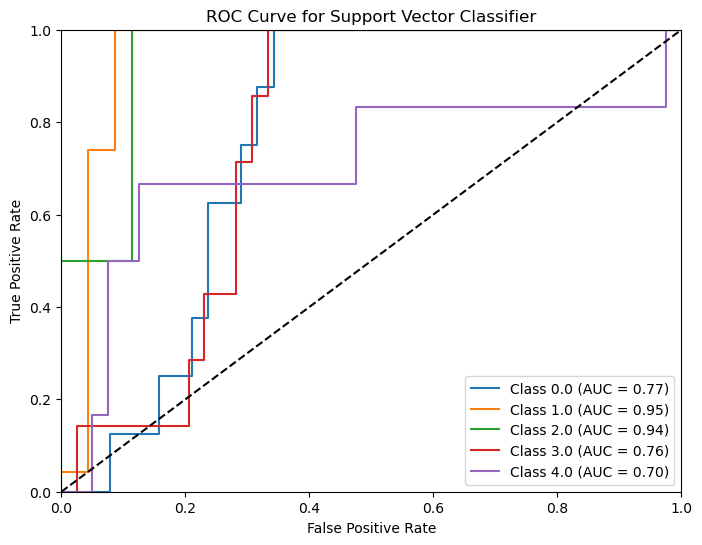

/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=10).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=30).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=40).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/vitthal/miniforge3/lib/python3.10/site-packages/sklearn/svm/_base.py:299: Con

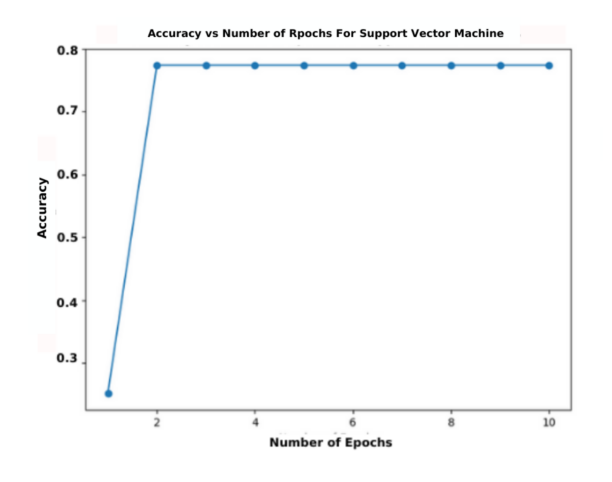

In [110]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Read the feature file into a pandas dataframe
df = pd.read_csv(
    '/Users/vitthal/Documents/GitHub/marine-enhancement/Data/csv/boat_type_features.csv')

# Select the top 5 features and the target variable
top_features = ['mean_speed', 'sd_speed',
                'mean_course', 'sd_course', 'mean_dis_port']
target_variable = 'unique_id'

X = df[top_features]
y = df[target_variable]


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Create an SVC classifier
svc_classifier = SVC(probability=True)

# Train the classifier on the training data
svc_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_proba = svc_classifier.predict_proba(X_test)

# Compute the ROC curve and ROC AUC score for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(svc_classifier.classes_)):
    fpr[i], tpr[i], _ = roc_curve(
        y_test, y_pred_proba[:, i], pos_label=svc_classifier.classes_[i])
    roc_auc[i] = roc_auc_score(pd.get_dummies(
        y_test, drop_first=False).iloc[:, i], y_pred_proba[:, i])

# Plot the ROC curve
plt.figure(figsize=(8, 6))
for i in range(len(svc_classifier.classes_)):
    plt.plot(fpr[i], tpr[i],
             label=f'Class {svc_classifier.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Support Vector Classifier')
plt.legend(loc='lower right')
plt.show()

# Define the number of epochs
epochs = range(1, 11)

# Train the classifier with different numbers of epochs and calculate accuracy
accuracy_scores = []
for epoch in epochs:
    # Create an SVC classifier with the current number of epochs
    svc_classifier = SVC(probability=True, max_iter=epoch * 10)

    # Train the classifier on the training data
    svc_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = svc_classifier.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

plot_auc_roc_curvesv(epoch, accuracy_scores)